Web Scraping is a process of automatically extracting data from websites using code or tools.

Example:
→ You visit Amazon manually → Search Laptop → Copy Product Name, Price, Rating → Paste into Excel
→ This is Manual Scraping


Web Scraping does this Automatically using Python!
Python → sends request → reads website code (HTML) → extracts required data → stores in Excel/CSV/Dataframe.

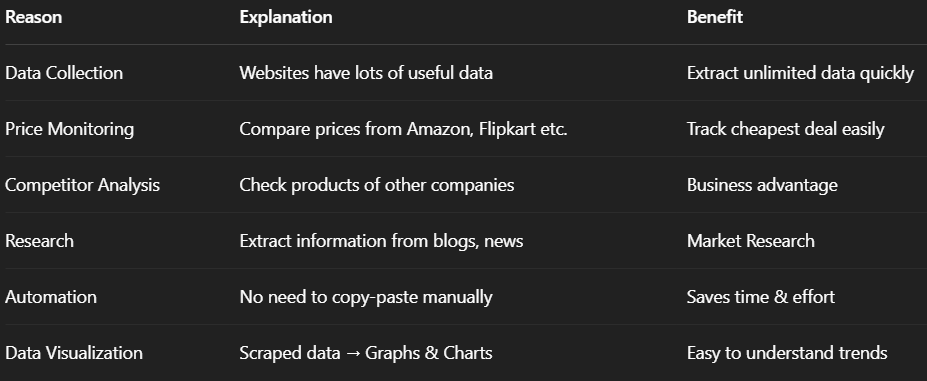


In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
url = 'https://books.toscrape.com/catalogue/page-1.html'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

titles = []
prices = []

books = soup.find_all('article', class_='product_pod')

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    titles.append(title)
    prices.append(price)

# Create DataFrame
df = pd.DataFrame({'Title': titles, 'Price': prices})
df.head()


,Title,Price
0,A Light in the Attic,£51.77
1,Tipping the Velvet,£53.74
2,Soumission,£50.10
3,Sharp Objects,£47.82
4,Sapiens: A Brief History of Humankind,£54.23


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

titles = []
prices = []
availability = []
ratings = []

for page in range(1, 6):  # Scrape first 5 pages
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        titles.append(book.h3.a['title'])
        prices.append(book.find('p', class_='price_color').text)
        availability.append(book.find('p', class_='instock availability').text.strip())
        ratings.append(book.p['class'][1])  # Rating is in class name

df = pd.DataFrame({'Title': titles, 'Price': prices, 'Availability': availability, 'Rating': ratings})
df.head(100)


,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
...,...,...,...,...
95,Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...,Â£19.92,In stock,Two
96,"Layered: Baking, Building, and Styling Spectac...",Â£40.11,In stock,One
97,Judo: Seven Steps to Black Belt (an Introducto...,Â£53.90,In stock,Two
98,Join,Â£35.67,In stock,Five


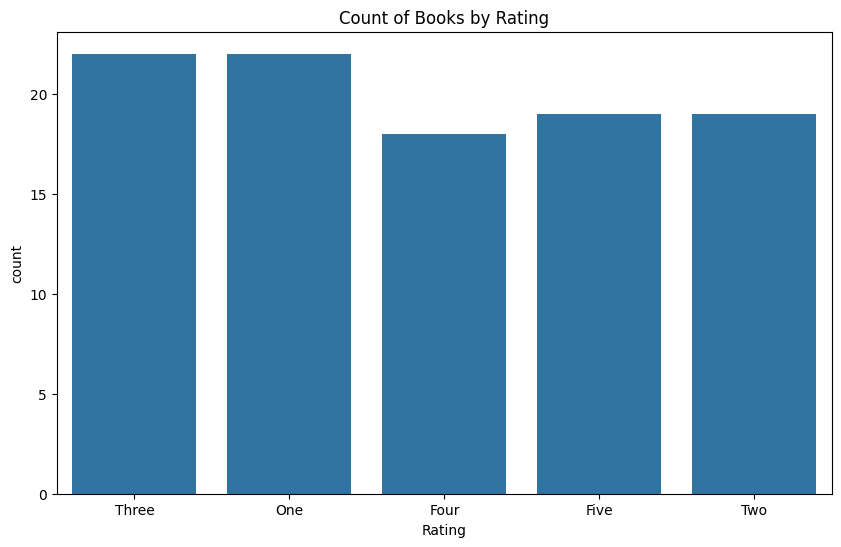

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='Rating', data=df)
plt.title('Count of Books by Rating')
plt.show()


In [ ]:
!pip install requests beautifulsoup4 pandas


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}


In [ ]:
def scrape_amazon_page(url):
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')

    products = soup.find_all('div', {'data-component-type': 's-search-result'})

    data = []

    for product in products:
        name = product.h2.text.strip()

        try:
            price = product.find('span', 'a-price-whole').text.strip()
        except:
            price = "Not Available"

        try:
            rating = product.find('span', {'class': 'a-icon-alt'}).text.strip()
        except:
            rating = "No Rating"

        try:
            stock = "Available"
        except:
            stock = "Unknown"

        data.append([name, price, rating, stock])

    return data


In [ ]:
final_data = []

for page in range(1, 4):  # Scraping first 3 pages
    url = f"https://www.amazon.in/s?k=laptop&page={page}"
    final_data.extend(scrape_amazon_page(url))

df = pd.DataFrame(final_data, columns=['Product Name', 'Price', 'Rating', 'Availability'])
df.head()


,Product Name,Price,Rating,Availability
0,Lenovo V15 G4 AMD Ryzen 5 7520U 15.6 inch FHD ...,"34,990",4.6 out of 5 stars,Available
1,Acer ALG Intel Core i5-13th Gen 13420H Process...,"63,999",No Rating,Available
2,"Lenovo V14 G3, 12th Gen Intel Core i7-1255U Up...","44,988",5.0 out of 5 stars,Available
3,"HP 15s,12th Gen Intel Core i3-1215U, 8GB DDR4,...","33,990",4.2 out of 5 stars,Available
4,ACER One 14 AMD Ryzen 3 Dual Core 3250U - (8 G...,"22,990",5.0 out of 5 stars,Available


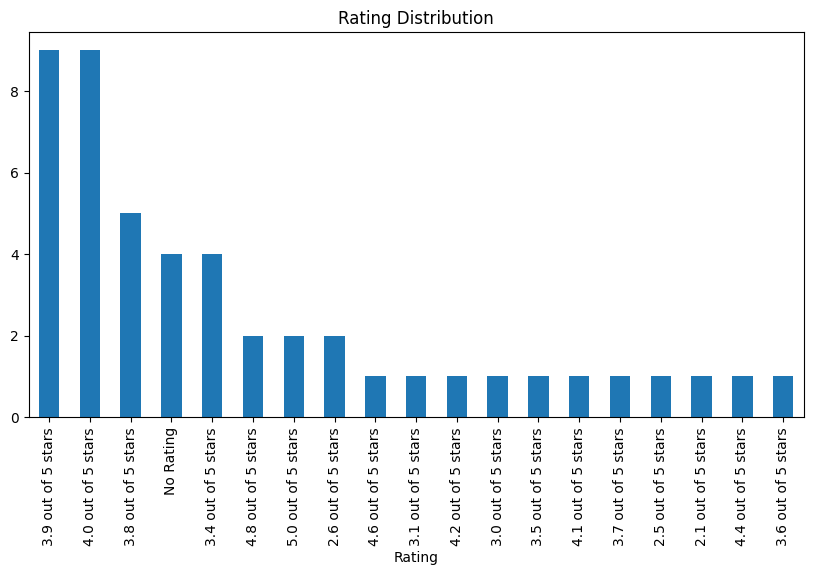

In [ ]:
import matplotlib.pyplot as plt

# Most Frequent Ratings
df['Rating'].value_counts().plot(kind='bar', figsize=(10,5), title='Rating Distribution')
plt.show()


Scrapping from Diffrent E-Commerce Website


In [ ]:
!pip install requests beautifulsoup4 pandas


In [42]:
!pip install requests
!pip install beautifulsoup4


In [43]:
import requests
from bs4 import BeautifulSoup


In [46]:
# Install Required Libraries
!pip install requests beautifulsoup4 lxml

import requests
from bs4 import BeautifulSoup

def scrape_amazon(product):
    print("\nScraping Amazon...")
    headers = {'User-Agent': 'Mozilla/5.0'}
    url = f"https://www.amazon.in/s?k={product.replace(' ', '+')}"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "lxml")

    for item in soup.select('.s-result-item'):
        name = item.select_one('h2')
        price = item.select_one('.a-price-whole')
        rating = item.select_one('.a-icon-alt')
        if name and price and rating:
            print(f"Name   : {name.text.strip()}")
            print(f"Price  : ₹{price.text.strip()}")
            print(f"Rating : {rating.text.strip()}")
            print("-" * 40)

def scrape_flipkart(product):
    print("\nScraping Flipkart...")
    headers = {'User-Agent': 'Mozilla/5.0'}
    url = f"https://www.flipkart.com/search?q={product.replace(' ', '+')}"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "lxml")

    for item in soup.select('._1AtVbE'):
        name = item.select_one('._4rR01T')
        price = item.select_one('._30jeq3')
        rating = item.select_one('._3LWZlK')
        if name and price and rating:
            print(f"Name   : {name.text.strip()}")
            print(f"Price  : {price.text.strip()}")
            print(f"Rating : {rating.text.strip()} ⭐")
            print("-" * 40)

def scrape_snapdeal(product):
    print("\nScraping Snapdeal...")
    headers = {'User-Agent': 'Mozilla/5.0'}
    url = f"https://www.snapdeal.com/search?keyword={product.replace(' ', '%20')}"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "lxml")

    for item in soup.select('.product-tuple-listing'):
        name = item.select_one('.product-title')
        price = item.select_one('.product-price')
        rating = item.select_one('.filled-stars')
        if name and price:
            print(f"Name   : {name.text.strip()}")
            print(f"Price  : {price.text.strip()}")
            print(f"Rating : {rating['style'] if rating else 'Not Available'}")
            print("-" * 40)

while True:
    print("\n----- E-Commerce Web Scraper -----")
    print("1. Amazon")
    print("2. Flipkart")
    print("3. Snapdeal")
    print("4. Exit")

    choice = input("Enter Your Choice: ")

    if choice == '4':
        print("Exiting Program...")
        break

    product = input("Enter Product Name to Search: ")

    if choice == '1':
        scrape_amazon(product)
    elif choice == '2':
        scrape_flipkart(product)
    elif choice == '3':
        scrape_snapdeal(product)
    else:
        print("Invalid Choice! Please try again.")



----- E-Commerce Web Scraper -----
1. Amazon
2. Flipkart
3. Snapdeal
4. Exit
Enter Your Choice: 1
Enter Product Name to Search: Laptops

Scraping Amazon...
Name   : HP 255 G10 AMD Ryzen 5 Quad Core 7520U 2.8Ghz Upto 4.3Ghz - (8 GB/512 GB SSD) 255 G10 Thin and Light Laptop (15.6 inch, Matt Silver, 1.45 kg)
Price  : ₹29,990
Rating : 3.1 out of 5 stars
----------------------------------------
Name   : Lenovo V15 G4 AMD Ryzen 5 7520U 15.6 inch FHD Thin & Lite Laptop, AMD Graphics, 16GB DDR5 5500Mhz Ram, 512GB SSD NVMe, Windows 11, Dolby Audio, Arctic Grey, 1 Year Onsite Brand Warranty
Price  : ₹34,990
Rating : 4.6 out of 5 stars
----------------------------------------
Name   : HP 15s,12th Gen Intel Core i3-1215U, 8GB DDR4, 512 GB SSD(Win 11, Office 21, Silver, 1.69kg), Anti-Glare, 15.6inch(39.6Cm), FHD Laptop, Intel UHD Graphics, Dual Speakers, HD Camera, fy5006tu
Price  : ₹33,990
Rating : 4.2 out of 5 stars
----------------------------------------
Name   : Lenovo IdeaPad Slim 1 Intel® C